In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# Exercise 02.1

In this exercise it was asked to calculate the integral $I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx$ sampling, first, an uniform distribution in $[0,1]$ and, then, using the method of importance sampling. 

To evaluate this integral, in both cases, I used in total $M = 16 x 10^4$ steps and in order to add the uncertainties I applied the blocking method by diviiding the $M$ steps in $N = 100$ blocks.

For the importance sampling I used a non-uniform distribution in $[0,1]$ with the following shape $g(x) = 1 - \sqrt{1-x}$, where $x$ are the random numbers extracted uniformly in $[0,1]$. Therefore the integrand took the form $$\frac{\pi}{2}\frac{cos(\pi x/2)}{g(x)}$$

The results are shown in this plot. We can see that in the case of the importance sampling the integral is well evaluated even with a small number of steps ($\simeq 8x10^4$), while in the case of the sampling of an uniform distribution the convergence is slower.

Text(0.5, 1.0, '$I$ with error bars')

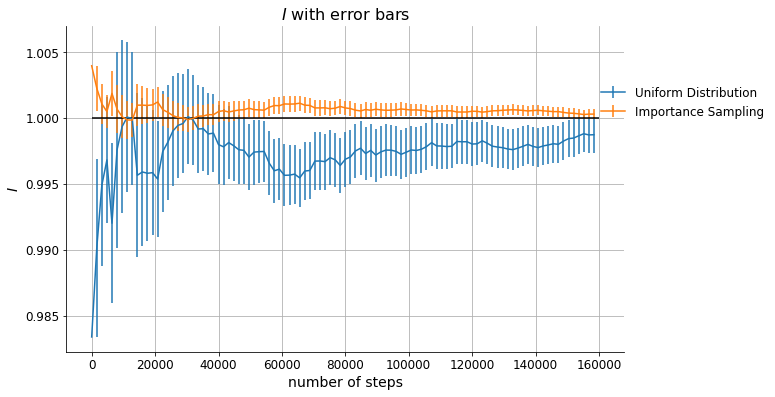

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

x1, f1, error1 = np.loadtxt("integrale_unifdistr.dat", usecols=(0,1,2), unpack='true') #per calcolo con distr unif
x2, f2, error2 = np.loadtxt("integrale_impsamp.dat", usecols=(0,1,2), unpack='true') #per calcolo con imp samp
ax.errorbar(x1,f1,yerr=error1, label = "Uniform Distribution")
ax.errorbar(x2,f2,yerr=error2, label = "Importance Sampling")
ax.hlines(1,0,160000)
ax.set_xlabel(r"number of steps")
ax.set_ylabel(r"$I$")
ax.grid(True)
ax.legend(loc=(0.95, 0.7), frameon=False)
ax.set_title(f"$I$ with error bars")

# Exercise 02.2

In the first part of this second exercise it was asked to do $M = 10^4$ random walks on a cubic lattice with spacing $a$ equal $1$ and, then, plot the square of the value $|r_i|^2$ averaged over all the $M$ random walks at each $i$ step of the $100$ steps and add its uncertainty. 

As it is expected for a random walk which has a diffusive behavior, the quadratic mean of the distance from the origin $\sqrt{\langle |\vec{r}_i|^2 \rangle_{RW}}$ at the $i$ step is equal to $a\sqrt{i}$; indeed we can see that this is the curve that fits the experimental data. 

The uncertainties grow in size with the number of steps. This is simply because more are the step more the endpoint of the various random walks will differ.  

optimized parameters a =
[1.00294711]
parameters uncertainty =
[0.00012338]


Text(0.5, 1.0, 'Random Walk on a cubic lattice ($a=1$)')

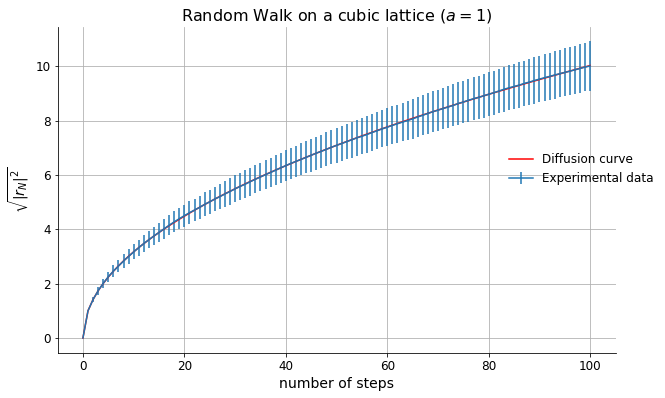

In [6]:
def f(x,a):  # defining the fitting function
    return a * x**(1/2)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

nstep,y,error= np.loadtxt("rN2_RWdiscrete.dat", usecols=(0,1,2), unpack='true')

ax.errorbar(nstep,y,yerr=error, label ="Experimental data")

p_opt, p_cov = curve_fit(f, nstep, y)
y_fit = f(nstep,p_opt)
ax.plot(nstep,y_fit, 'red', label = "Diffusion curve") # plotting fitted function

print("optimized parameters a =")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))

ax.set_xlabel(r"number of steps")
ax.set_ylabel(r"$\sqrt{|r_{N}|^2}$")
ax.grid(True)
ax.legend(loc=(0.8, 0.5), frameon=False)
ax.set_title(f"Random Walk on a cubic lattice ($a=1$)")

In this second part of the exercise the random walks are created by taking a step of size $a=1$ in a random direction of the continuum 3D-plane by sampling the solid angle ($\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$) and using polar coordinates. This can be done by extracting a random number from the distribution $p(x) = sin(x)/2$. This is possible by using the method of the inversion of the cumulative distribution: I extracted a random number $x$ uniformly between $[-1,1]$ and calculated $\theta$ as $acos(x)$ and $\phi$ as $acos(x)$ with $50$% of probability or as $acos(x) + \pi$ with the same probability. Then, I calculate the point $(x,y,z)$ applying the polar coordinates. 

The results are the same as the random walk on the cubic lattice.

optimized parameters a =
[0.99858194]
parameters uncertainty =
[0.00017121]


Text(0.5, 1.0, 'Random Walk in the continuum ($a=1$)')

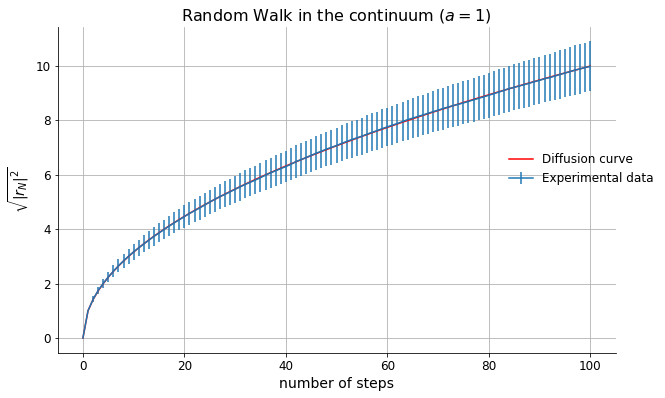

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

nstep,y,error= np.loadtxt("rN2_RWcontinuum.dat", usecols=(0,1,2), unpack='true')

ax.errorbar(nstep,y,yerr=error,label ="Experimental data")

p_opt, p_cov = curve_fit(f, nstep, y)
y_fit = f(nstep,p_opt)
ax.plot(nstep,y_fit, 'red',label ="Diffusion curve") # plotting fitted function

print("optimized parameters a =")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))

ax.set_xlabel(r"number of steps")
ax.set_ylabel(r"$\sqrt{|r_{N}|^2}$")
ax.grid(True)
ax.legend(loc=(0.8, 0.5), frameon=False)
ax.set_title(f"Random Walk in the continuum ($a=1$)")